## Uses PyTrends
* Find Documenation here https://pypi.org/project/pytrends/
* First run pip install pytrends in terminal

In [62]:
# You need to run "pip install pytrends" in terminal in order to import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
import matplotlib.pyplot as plt
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

colnames = ["keywords"]
df = pd.read_csv("search_terms.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-10 2020-08-05', # from and to dates here
     geo='US-IL') # 
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

df = pd.concat(dataset, axis=1)
df.to_csv('trends.csv')
executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))
print(df)

Execution time in sec.: 2.262451410293579
            domestic violence hotline  domestic violence help  \
date                                                            
2020-01-10                          0                       0   
2020-01-11                          0                       0   
2020-01-12                          0                       0   
2020-01-13                          0                       0   
2020-01-14                          0                       0   
...                               ...                     ...   
2020-08-01                          0                       0   
2020-08-02                          0                       0   
2020-08-03                          0                       0   
2020-08-04                         85                       0   
2020-08-05                          0                       0   

            domestic abuse hotline  domestic abuse help  order of protection  
date                             

In [63]:
df = df.reset_index()
rangedf = df[(df['date'] >= '2020-01-10') & (df['date'] <= '2020-08-05')]
dfpre = rangedf[(rangedf['date'] >= '2020-01-10') & (rangedf['date'] <= '2020-03-19')]
dflockdown = rangedf[(rangedf['date'] >= '2020-03-20') & (rangedf['date'] <= '2020-05-28')]
dfpost = rangedf[(rangedf['date'] >= '2020-05-29') & (rangedf['date'] <= '2020-08-05')]

In [64]:
import pingouin as pg
dfpre["group"] = 'Pre-lockdown'
dflockdown["group"] = 'Lockdown'
dfpost["group"] = 'Post-lockdown'
dfgroups = dfpre.iloc[:-1 , :].append(dflockdown).iloc[:-1 , :].append(dfpost).iloc[:-1 , :]
dfgroups['order of protection'] = dfgroups["order of protection"].astype(float)
dfgroups['domestic abuse help'] = dfgroups['domestic abuse help'].astype(float)
dfgroups['domestic abuse hotline'] = dfgroups['domestic abuse hotline'].astype(float)
dfgroups['domestic violence help'] = dfgroups['domestic violence help'].astype(float)
dfgroups['domestic violence hotline'] = dfgroups['domestic violence hotline'].astype(float)
dfgroups.groupby('group').mean()

<ipython-input-64-606f29363f12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpre["group"] = 'Pre-lockdown'
<ipython-input-64-606f29363f12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflockdown["group"] = 'Lockdown'
<ipython-input-64-606f29363f12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,domestic violence hotline,domestic violence help,domestic abuse hotline,domestic abuse help,order of protection
group,,,,,
Lockdown,5.420290,3.405797,3.115942,1.449275,14.101449
Post-lockdown,9.235294,2.338235,3.632353,0.000000,20.176471
Pre-lockdown,1.144928,3.927536,5.028986,0.000000,21.362319


In [65]:
dfgroups.groupby('group').std()

,domestic violence hotline,domestic violence help,domestic abuse hotline,domestic abuse help,order of protection
group,,,,,
Lockdown,19.539858,16.132101,14.736446,12.038585,19.513302
Post-lockdown,27.521562,13.534489,17.054701,0.000000,25.489794
Pre-lockdown,9.510482,18.628188,20.564083,0.000000,24.954058


In [67]:
pg.welch_anova(dv='domestic violence hotline', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,113.648,3.482,0.034,0.026


In [72]:
pg.pairwise_tukey(dv='domestic violence hotline', between='group', data=dfgroups).round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Lockdown,Post-lockdown,5.420,9.235,-3.815,3.452,-1.105,0.512,-0.188
1,Lockdown,Pre-lockdown,5.420,1.145,4.275,3.440,1.243,0.431,0.210
2,Post-lockdown,Pre-lockdown,9.235,1.145,8.090,3.452,2.343,0.052,0.398


In [68]:
pg.welch_anova(dv='domestic violence help', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,133.371,0.186,0.83,0.002


In [69]:
pg.welch_anova(dv='domestic abuse hotline', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,132.988,0.198,0.821,0.002


In [70]:
pg.welch_anova(dv='domestic abuse help', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,181.333,0.498,0.608,0.01


In [71]:
pg.welch_anova(dv='order of protection', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,132.902,2.226,0.112,0.018


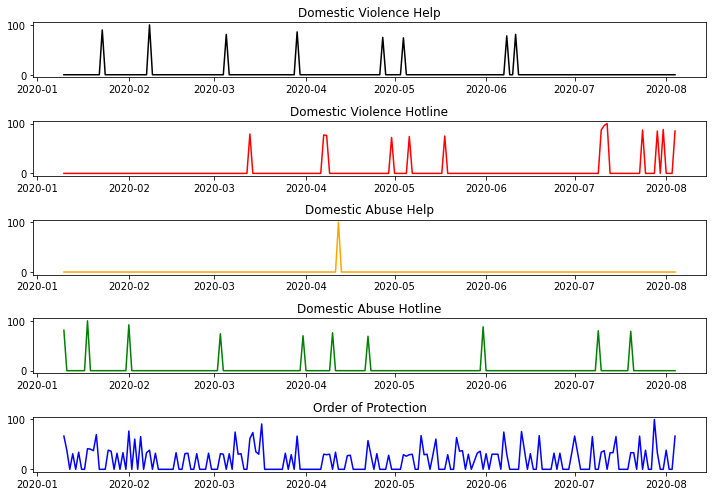

In [55]:
plt.figure(figsize=(10,7))

plt.subplot(5, 1, 1)
plt.plot(dfgroups['date'], dfgroups["domestic violence help"],'black')
plt.title('Domestic Violence Help')

plt.subplot(5, 1, 2)
plt.plot(dfgroups['date'], dfgroups["domestic violence hotline"],'red')
plt.title('Domestic Violence Hotline')

plt.subplot(5, 1, 3)
plt.plot(dfgroups['date'],dfgroups["domestic abuse help"],'orange')
plt.title('Domestic Abuse Help')

plt.subplot(5, 1, 4)
plt.plot(dfgroups['date'],dfgroups["domestic abuse hotline"],'green')
plt.title('Domestic Abuse Hotline')

plt.subplot(5, 1, 5)
plt.plot(dfgroups['date'],dfgroups["order of protection"],'blue')
plt.title('Order of Protection')

plt.tight_layout()
plt.savefig("rawsearchtermsgraph.png", dpi = 350)
plt.show();